In [185]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from datetime import datetime

from sklearn.preprocessing import LabelEncoder
import random
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error


In [29]:
#Loading the data
data = pd.read_excel('TWDataset2.xlsx')
data1 = data.iloc[:,0:8:7]

#Grouping the data based on the payment method
dfA = data.loc[(data['payment_method'] == 'A' )]
dfB = data.loc[data['payment_method'] == 'B']
dfC = data.loc[data['payment_method'] == 'C']
dfAB = data.loc[(data['payment_method'] == 'A' ) | (data['payment_method'] == 'B') ]

#Filtering columns for the transfer time and duration
dataA = data.iloc[:,0:7:6]
dataB = data.iloc[:,0:7:6]
dataC = data.iloc[:,0:7:6]
dataAB = data.iloc[:,0:7:6]

#Merging transactions to get the daily average duration
dfAGroup = dfA.groupby([dfA['transfer_created_by_customer_time'].dt.date], as_index=True,).mean()
dfBGroup = dfB.groupby([dfB['transfer_created_by_customer_time'].dt.date], as_index=True,).mean()
dfCGroup = dfC.groupby([dfC['transfer_created_by_customer_time'].dt.date], as_index=True,).mean()



In [88]:
print(dfAGroup.describe())
print('-------------------')
print(dfBGroup.describe())

print('-------------------')
print(dfCGroup.describe())

       deliv_dur_min
count     357.000000
mean     4555.114522
std      1985.283551
min      1584.275000
25%      3068.058333
50%      4192.566667
75%      5499.633333
max     19769.609524
-------------------
       deliv_dur_min
count      69.000000
mean      423.005475
std       839.689780
min        27.083333
25%        50.550000
50%        92.161111
75%       482.694444
max      5447.733333
-------------------
       deliv_dur_min
count      74.000000
mean     3400.707819
std      5718.544371
min        15.016667
25%        28.779167
50%      2331.006667
75%      4217.516667
max     43863.277778


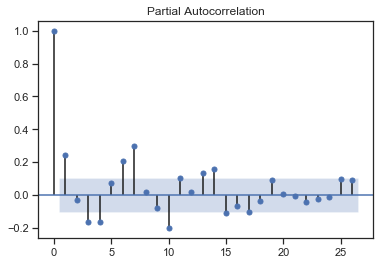

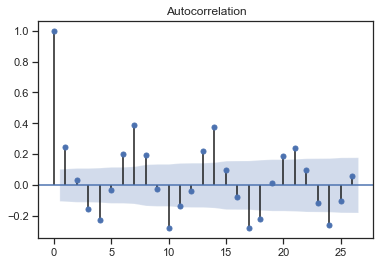

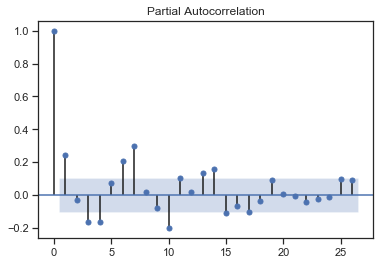

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

#PACF and ACF Plots

plot_acf(dfAGroup)
plot_pacf(dfAGroup)


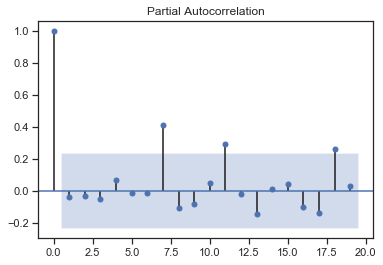

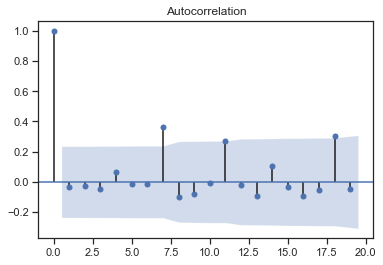

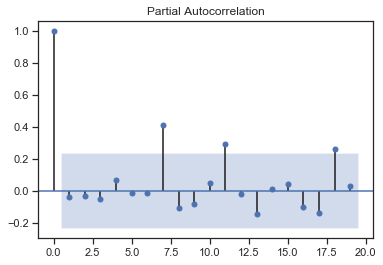

In [60]:
plot_acf(dfBGroup)
plot_pacf(dfBGroup)

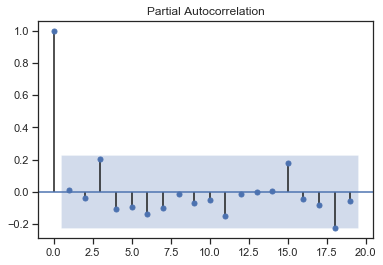

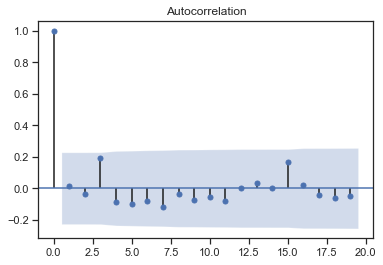

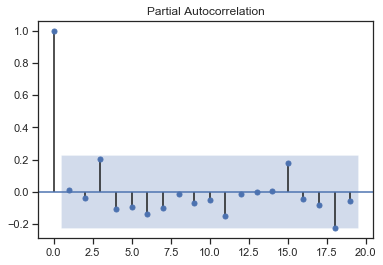

In [61]:
plot_acf(dfCGroup)
plot_pacf(dfCGroup)

predicted=4063.670038, expected=3269.644444
predicted=4544.981119, expected=6176.007143
predicted=4940.546669, expected=6573.446667
predicted=5142.721076, expected=8796.608333
predicted=5432.235272, expected=3052.700000
predicted=3959.266632, expected=3560.085897
predicted=3305.744868, expected=5158.625000
predicted=4062.290982, expected=3397.175000
predicted=5271.100624, expected=4894.620833
predicted=5618.119083, expected=5399.063889
predicted=5087.347632, expected=4127.116667
predicted=4896.439764, expected=3135.295833
predicted=4293.110011, expected=3698.821429
predicted=4006.312072, expected=5234.841667
predicted=4687.138350, expected=6612.904167
predicted=5359.048890, expected=6217.096667
predicted=5168.385661, expected=5107.161111
predicted=4444.093523, expected=4299.922222
predicted=3994.459822, expected=3266.762500
predicted=4087.353888, expected=3651.981481
predicted=4597.562399, expected=3748.548148
predicted=4920.153777, expected=5349.823810
predicted=5274.732947, expected=

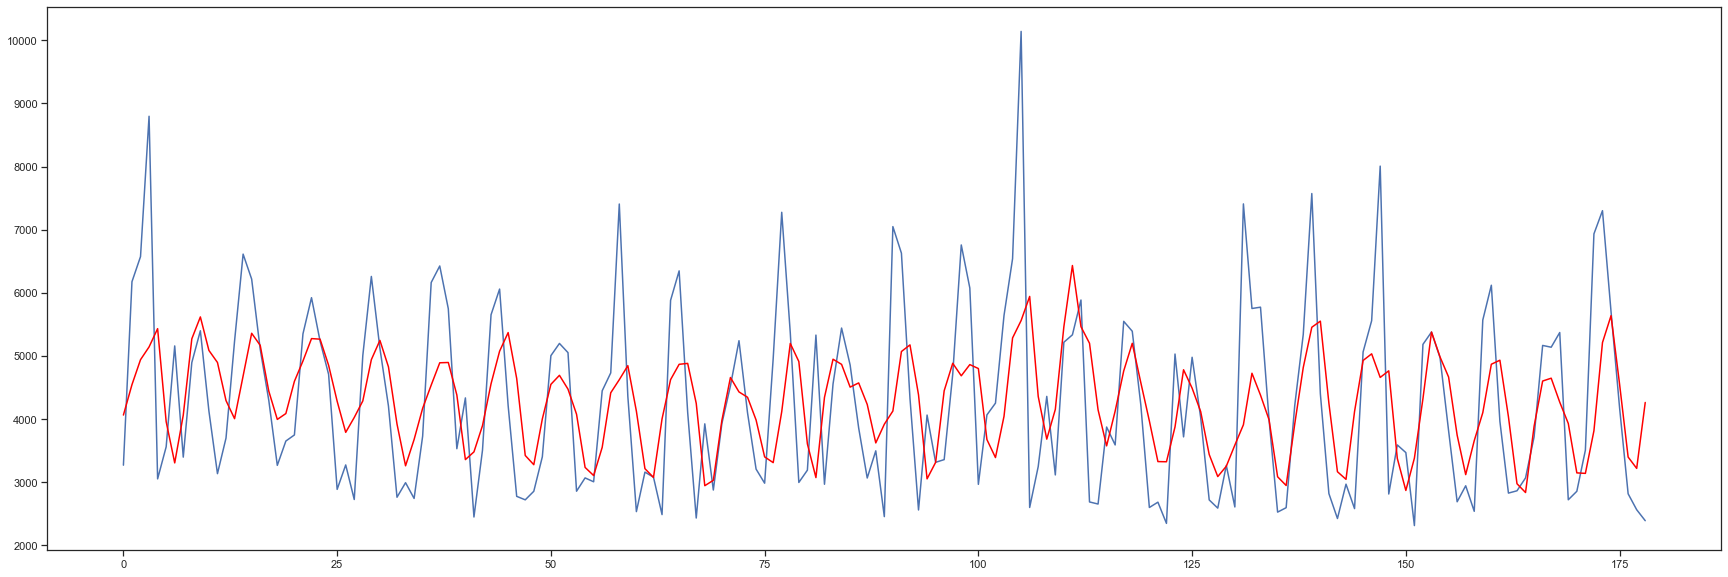

In [208]:
#Seperating train and test model and creating an 
X = dfAGroup.values
size = int(len(X) * 0.5)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print(' Test MSE: %.3f' % error)

# plot
plt.figure(figsize = (30,10))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [209]:
error = mean_squared_error(test, predictions)
print(' Test MSE on test data: %.3f' % error)

#error2 = mean_squared_error(train, predictions)
#print(' Test MSE on test data: %.3f' % error2)

RMSE = np.sqrt(error)
print(' NRMSD on test data: %.3f' % RMSE)

NRMSD = np.sqrt(error)/(np.max(test) - np.min(test))
print(' NRMSD on test data: %.3f' % NRMSD)




 Test MSE on test data: 1578365.935
 NRMSD on test data: 1256.330
 NRMSD on test data: 0.160


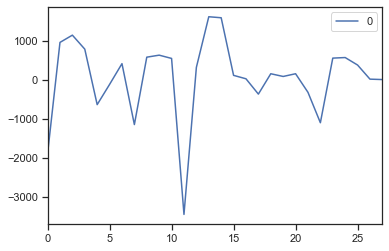

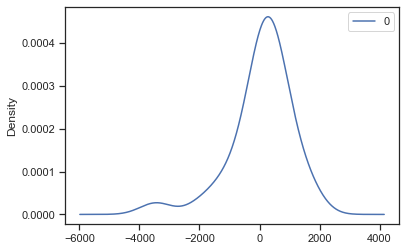

                 0
count    28.000000
mean     59.805524
std    1032.281064
min   -3450.793670
25%    -167.082661
50%     157.503494
75%     575.333767
max    1619.427202


In [177]:
test = [x for x in test]

dfObj = pd.DataFrame(predictions) 
# calculate residuals
residuals = [predictions[i]-test[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)

residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [5]:
dfAGroup[180:210]

#4299 is 18/07
#6933 is 23/12

,deliv_dur_min
transfer_created_by_customer_time,
2015-07-03,6573.446667
2015-07-04,8796.608333
2015-07-05,3052.700000
2015-07-06,3560.085897
2015-07-07,5158.625000
2015-07-08,3397.175000
2015-07-09,4894.620833
2015-07-10,5399.063889
2015-07-11,4127.116667


predicted=499.731580, expected=2402.372222
predicted=786.869893, expected=99.466667
predicted=1018.287270, expected=61.250000
predicted=779.621883, expected=126.208333
predicted=657.308251, expected=729.533333
predicted=712.252365, expected=416.550000
predicted=320.317800, expected=50.550000
predicted=304.478418, expected=1565.138889
predicted=550.409670, expected=53.083333
predicted=671.948670, expected=41.308333
predicted=476.564860, expected=27.083333
predicted=384.933921, expected=3491.500000
predicted=791.848499, expected=772.516667
predicted=914.280929, expected=39.800000
predicted=918.524776, expected=42.533333
predicted=1383.089747, expected=160.412500
predicted=1072.019341, expected=55.204167
predicted=196.959822, expected=453.983333
predicted=142.659917, expected=72.900000
predicted=172.331621, expected=117.894444
predicted=163.898945, expected=54.450000
predicted=187.778650, expected=402.808333
predicted=207.038855, expected=1296.466667
predicted=380.713021, expected=63.1166

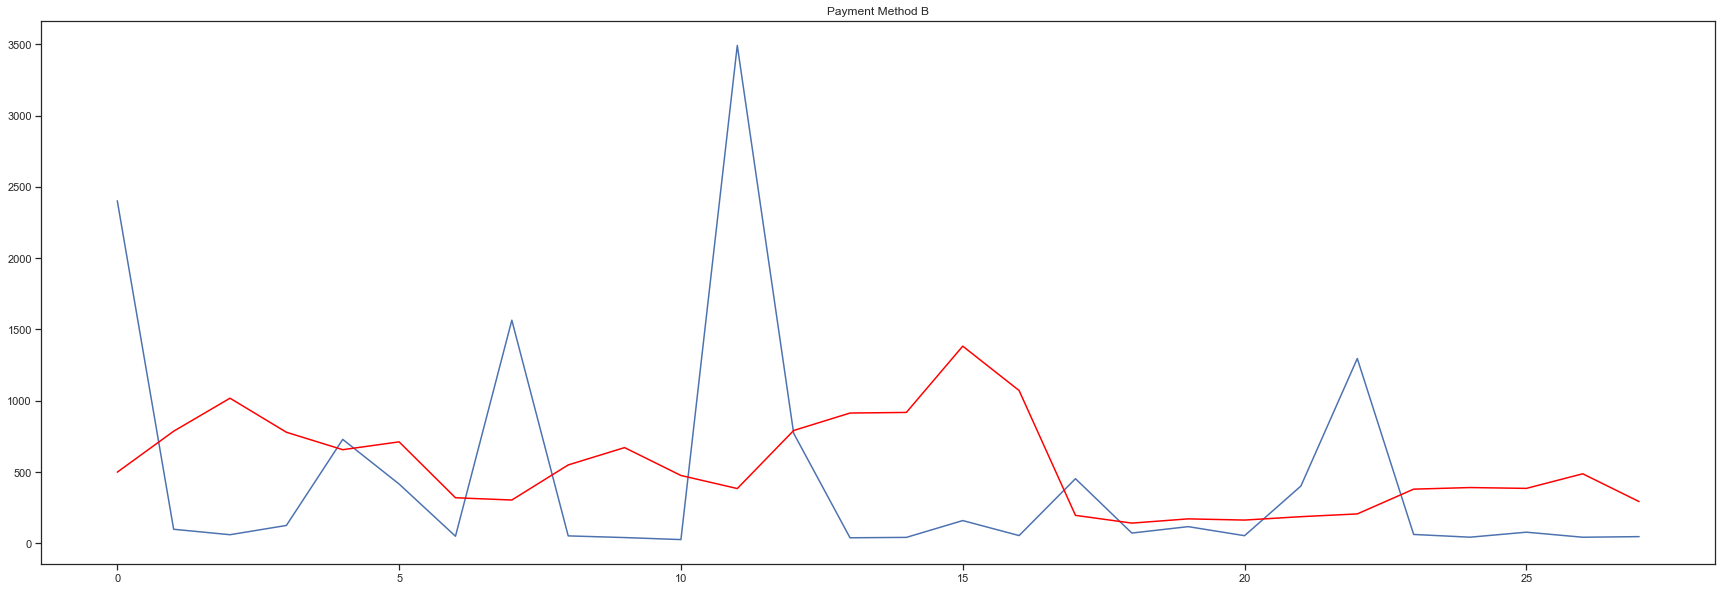

In [289]:
X = dfBGroup.values
size = int(len(X) * 0.6)
size= round(size)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print(' Test MSE: %.3f' % error)

# plot
plt.figure(figsize = (30,10))
plt.plot(test)
plt.title('Payment Method B')
plt.plot(predictions, color='red')
plt.show()


In [290]:
error = mean_squared_error(test, predictions)
print(' Test MSE on test data: %.3f' % error)

RMSE = np.sqrt(error)
print(' RMSE on test data: %.3f' % RMSE)

NRMSD = np.sqrt(error)/(np.max(test) - np.min(test))
print(' NRMSD on test data: %.3f' % NRMSD)



 Test MSE on test data: 844380.052
 RMSE on test data: 918.902
 NRMSD on test data: 0.265


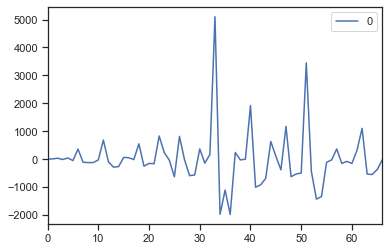

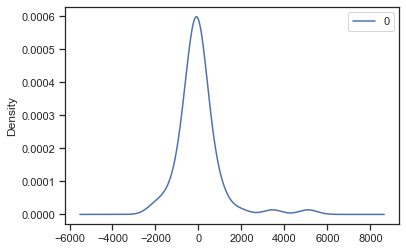

                 0
count    67.000000
mean      0.078775
std    1000.586692
min   -1979.143772
25%    -410.963589
50%     -50.995001
75%     136.435011
max    5101.253966


In [178]:
# ploting residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [148]:
dfBGroup

#402.808333 is 23/12

print(np.sqrt(1031123.603))
print(np.sqrt(845053.904))

1015.4425650916944
919.2681349856526


predicted=5345.839813, expected=4262.683333
predicted=3788.686019, expected=4069.950000
predicted=4316.273765, expected=4438.783333
predicted=4433.051833, expected=2772.533333
predicted=3670.445408, expected=9048.033333
predicted=6362.948581, expected=6205.966667
predicted=7789.356200, expected=7026.583333
predicted=6881.004802, expected=6946.183333
predicted=7215.438923, expected=11614.983333
predicted=9759.588005, expected=3380.066667
predicted=7500.504378, expected=2888.316667
predicted=3208.290083, expected=780.566667
predicted=1811.739985, expected=3586.950000
predicted=2353.099191, expected=5737.416667
predicted=4887.924033, expected=8783.750000
predicted=7597.278181, expected=2822.516667
predicted=5758.281883, expected=1753.916667
predicted=2297.485284, expected=2888.500000
predicted=2439.930415, expected=3862.866667
predicted=3513.292799, expected=69.366667
predicted=1861.411905, expected=2785.083333
predicted=1569.555534, expected=2839.050000
predicted=2885.286705, expected=37

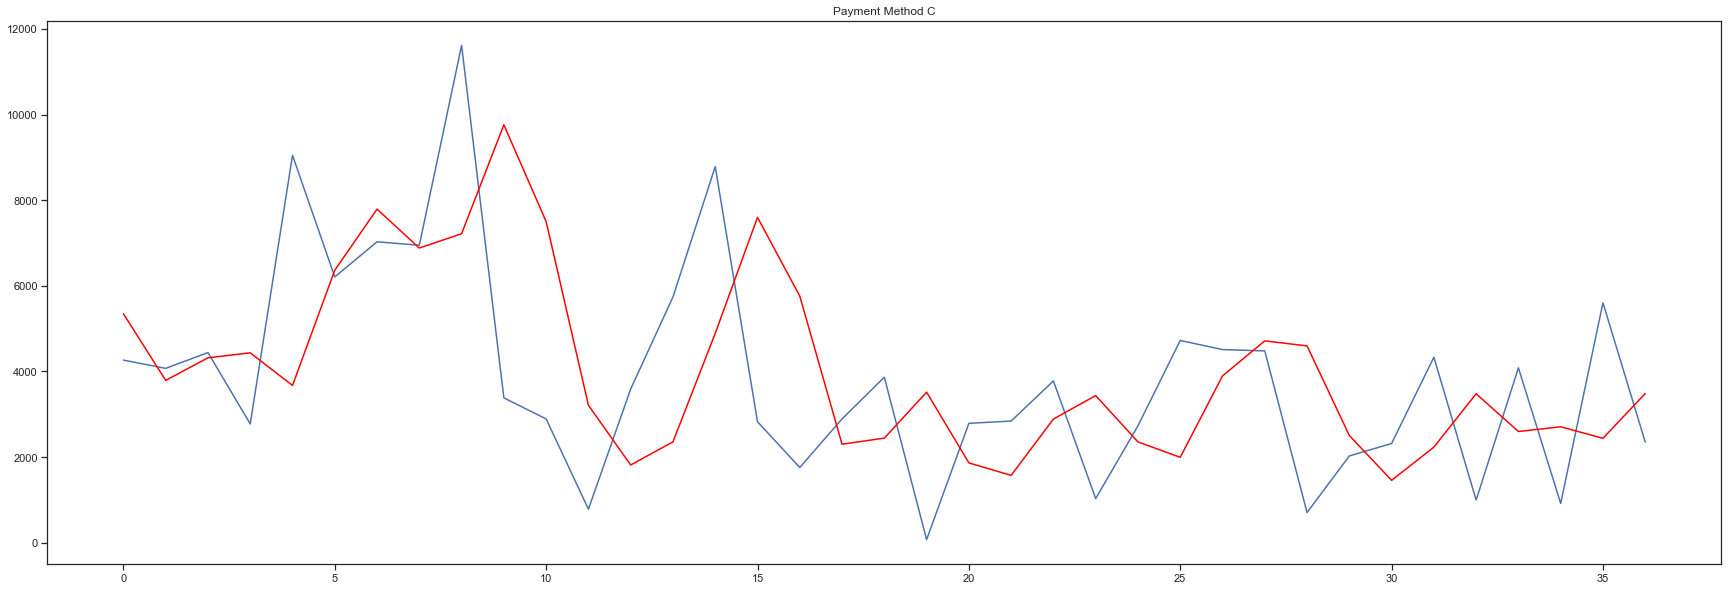

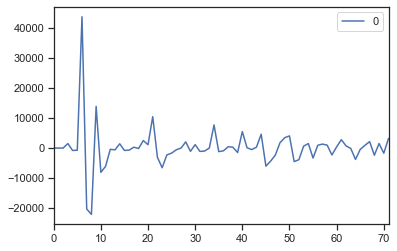

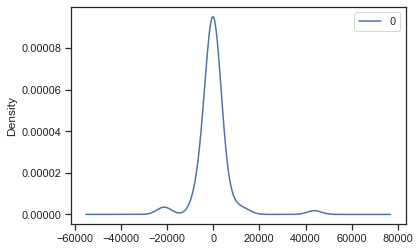

                  0
count     72.000000
mean      -1.127596
std     7154.691974
min   -22240.326687
25%    -1627.504026
50%      -85.040270
75%     1269.035267
max    43763.271337


In [234]:
X = dfCGroup.values
size = int(len(X) * 0.5)
size= round(size)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print(' Test MSE: %.3f' % error)

# plot
plt.figure(figsize = (30,10))
plt.title('Payment Method C')
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()



# ploting residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())


In [235]:
error = mean_squared_error(test, predictions)
print(' Test MSE on test data: %.3f' % error)

RMSE = np.sqrt(error)
print(' RMSE on test data: %.3f' % RMSE)

NRMSD = np.sqrt(error)/(np.max(test) - np.min(test))
print(' NRMSD on test data: %.3f' % NRMSD)

 Test MSE on test data: 7138728.951
 RMSE on test data: 2671.840
 NRMSD on test data: 0.231


In [76]:
dfCGroup
#2888.316667 is 10/08
#3380.066667 is 06/07



,deliv_dur_min
transfer_created_by_customer_time,
2015-01-05,15.033333
2015-01-06,15.050000
2015-01-07,15.016667
2015-01-09,15.016667
2015-01-12,1524.841667
...,...
2015-10-28,993.133333
2015-11-07,4082.016667
2015-12-02,914.050000
